In [2]:
import warnings
warnings.filterwarnings('ignore')

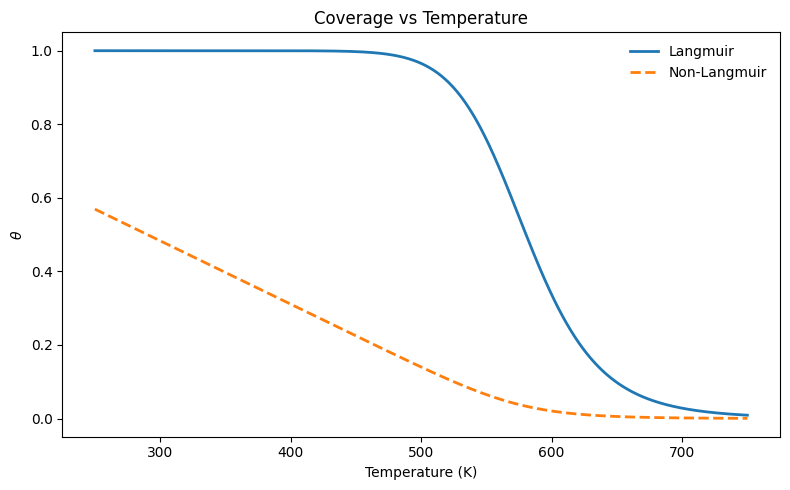

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
R = 8.314/1000  # kJ/mol·K

def theta_1(T, K0, Q0, P_A):
    exponent = Q0 / (R * T)
    numerator = K0 * np.exp(exponent) * P_A
    denominator = 1 + numerator
    return numerator / denominator

def theta_2(T, K0, Q0, P_A):
    exponent = Q0 / (R * T)
    term1 = np.log(1 + K0 * np.exp(exponent) * P_A)
    term2 = np.log(1 + K0 * P_A)
    return (R * T / Q0) * (term1 - term2)

def plot_coverages(T_range, K0, Q0, P_A):
    theta1_vals = theta_1(T_range, K0, Q0, P_A)
    theta2_vals = theta_2(T_range, K0, Q0, P_A)

    plt.figure(figsize=(8, 5))
    plt.plot(T_range, theta1_vals, label=r'Langmuir', lw=2)
    plt.plot(T_range, theta2_vals, label=r'Non-Langmuir', lw=2, linestyle='--')
    plt.xlabel('Temperature (K)')
    plt.ylabel(r'$\theta$')
    plt.title('Coverage vs Temperature')
    plt.legend(frameon = False)
    plt.tight_layout()
    # plt.savefig("/Users/mohan/Desktop/HW5_Q1d.png", dpi = 500)
    plt.show()

# Example usage
T_vals = np.linspace(250, 750, 500) # Kelvin
K0 = 1*10**(-9) # 1/bar
Q0_example = 100 # kJ/mol 
P_A_example = 1 # bar

plot_coverages(T_vals, K0, Q0_example, P_A_example)


# Question 2

## a)

Alpha = 0.9998395723030199


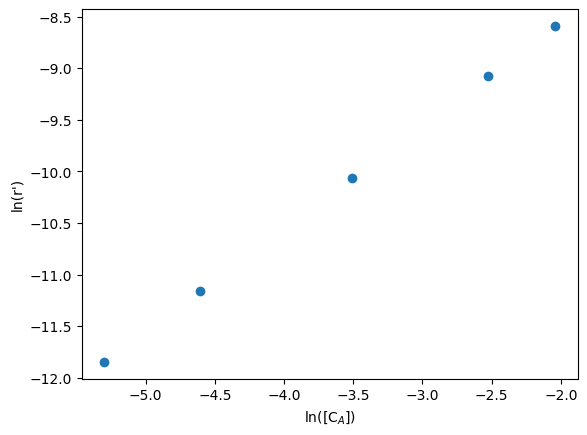

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# add in a dummy 0 so python indices match the experiment indices to avoid confusion

CA = np.array([0, 0.005, 0.01, 0.03, 0.08, 0.13, 0.20, 0.01, 0.20, 0.15, 0.07, 0.11, 0.04, 0.08, 0.06, 0.19])
CB = np.array([0, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.03, 0.0005, 0.0002, 0.0010, 0.0007, 0.9, 1.2, 1.5, 1.10])
CC = np.array([0, 2.86e-7, 5.71e-7, 1.71e-6, 4.57e-6, 7.43e-6, 1.14e-5, 3.75e-7, 2.79e-5, 2.22e-5, 8.98e-6, 1.47e-5, 3.24e-7, 5.64e-7, 3.80e-7, 1.4e-6])

rate = CC * 25 # ([C] * 50 L/min)/(2 g_cat)

slope, intercept = np.polyfit(np.log(CA)[1:6], np.log(rate[1:6]), 1)

alpha = slope

print(f"Alpha = {alpha}")

plt.scatter(np.log(CA)[1:6], np.log(rate[1:6]))
plt.xlabel(r"ln([C$_A$])")
plt.ylabel(r"ln(r')")
# plt.savefig("/Users/mohan/Desktop/HW5_Q2a.png", dpi = 500)
plt.show();

## b)

Assuming $\alpha$ = 1 and using assumption 1 (and experiments 8-11)

k = 0.0043 per gram catalyst


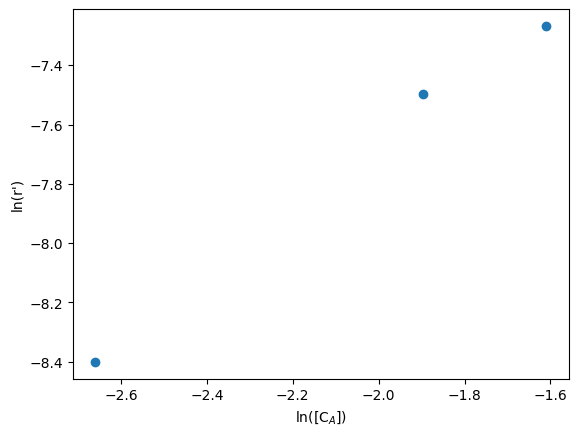

In [ ]:
b_slope, b_intercept = np.polyfit(np.log(CA[8:11]), np.log(rate[8:11]), 1)

k = np.exp(b_intercept)

print(f"k = {k:.4f} per gram catalyst")

plt.scatter(np.log(CA[8:11]), np.log(rate[8:11]))
plt.xlabel(r"ln([C$_A$])")
plt.ylabel(r"ln(r')")
# plt.savefig("/Users/mohan/Desktop/HW5_Q2b.png", dpi = 500)
plt.show();

## c)

Assuming $\alpha$ = 1, k = 0.0043

K = 22.15862780447105
Beta = 0.48169166121881335


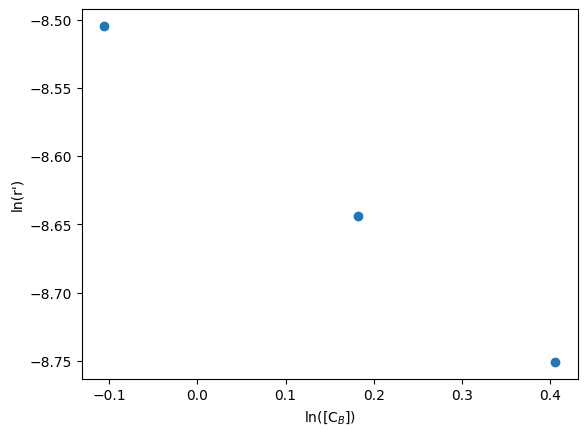

In [49]:
c_slope, c_intercept = np.polyfit(np.log(CB[12:15]), np.log(rate[12:15]/CA[12:15]), 1)

K = np.exp(np.log(k) - c_intercept)

beta = -c_slope

print(f"K = {K}")
print(f"Beta = {beta}")

plt.scatter(np.log(CB[12:15]), np.log(rate[12:15]/CA[12:15]))
plt.xlabel(r"ln([C$_B$])")
plt.ylabel(r"ln(r')")
plt.savefig("/Users/mohan/Desktop/HW5_Q2c.png", dpi = 500)
plt.show();

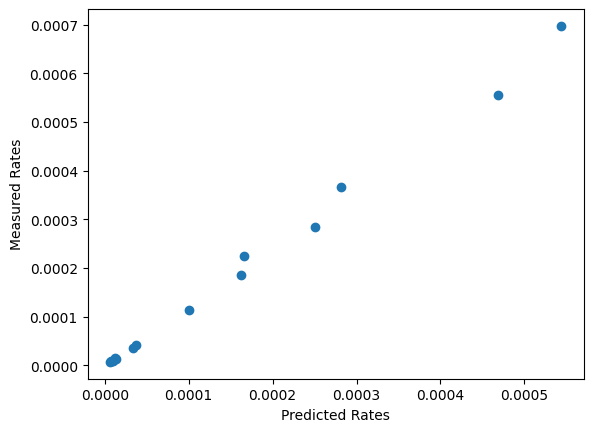

In [ ]:
CA = np.array([0, 0.005, 0.01, 0.03, 0.08, 0.13, 0.20, 0.01, 0.20, 0.15, 0.07, 0.11, 0.04, 0.08, 0.06, 0.19])
CB = np.array([0, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.03, 0.0005, 0.0002, 0.0010, 0.0007, 0.9, 1.2, 1.5, 1.10])

def calc_rate(k, K, CA, CB, a, b):
    return (k*CA**a / (1 + (K*CB**b)))

calculated_rates = calc_rate(k = k, K = K, CA = CA, CB = CB, a = alpha, b = beta)

plt.scatter(calculated_rates[1:], rate[1:])
plt.xlabel("Predicted Rates")
plt.ylabel("Measured Rates")
# plt.savefig("/Users/mohan/Desktop/HW5_Q2d.png", dpi = 500)
plt.show();

In [7]:
from sklearn.metrics import r2_score

r_squared = r2_score(calculated_rates[1:], rate[1:])
print(f"R² = {r_squared:.4f}")

R² = 0.8975


# Question 3

## c)

In [27]:
R = 8.314 # J/mol*K

T = 673 # Kelvin

mass = 64.066/1000 # SO2 molar mass in kg/mol

P = 2 # atm

d = 4 * 10**(-8) # meters

atm_to_pascal = 101325

kb = 1.381e-23 # J/K

v = np.sqrt((8 * R * T)/(np.pi * mass))

lamda = (kb * T)/(np.sqrt(2) * np.pi * d**2 * (P * atm_to_pascal))

D = (v*lamda)/3

D

1.0142028379769587e-09

In [44]:
C_AB = 2/(0.08206 * T) # P/RT = C where R = 0.08206 L*atm/(mol * K) --> C [=] mol/L

LHS = 2/(3 * D * C_AB)

# np.sqrt(1/LHS)

print(f"{C_AB} mol/L")

print(f"Maximum r_p to avoid MT limits: {np.sqrt((3 * D * C_AB)/2):.3e} meters")

0.03621457716402922 mol/L
Maximum r_p to avoid MT limits: 7.422e-06 meters
